In [1]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


TensorFlow 2.x selected.


# Deep Computer Vision

In this guide, the goal of the convolution neural networks will be to classify and detect images or specific objects from within the image.

Following concepts will be important:
*   Image Data
*   Convolution Layer
*   Pooling Layer
*   CNN Architectures




## Image Data

So far we have dealt with pretty straight forward data that has 1 or 2 dimensions. Now we are about to deal with image data that is usually made up of 3 dimensions:
*   image height
*   image width
*   color channels

 The number of color channels represents the depth of an image and correlates to the colors used in it. For example, an image with three channels is likely made up of RBG pixels. So for each pixel we have three numeric values in the range 0-255 that define its color.

## Convolution Neural Network

Each CNN is made up of one or many convolution layers. These layers are different that the dense layers. Their goal is to find patterns from within images that can be used to classify the image or parts of it. \
The fundamental difference between a dense layer and a convolution layer is that dense layers detect pattern globally while convolutional layers detects patterns locally. When we have a densely connected layer each node in that layer sees all the data from the previous layer. This mean that this layer is looking at ALL of the information and is only capable of analyzing the data in a global capacity. The convolution layer however will not be densly connected, this means it can detect local patterns using part the input data to that layer.

In [0]:
## LOAD AND SPLIT THE DATSET

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## Normalize pixel value to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
train_images.shape

(50000, 32, 32, 3)

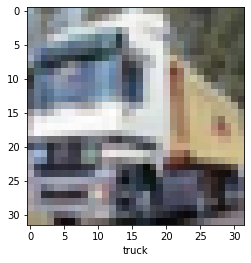

In [0]:
## Let's look at an image
IMG_INDEX = 1

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

## CNN Architecture

A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few densely connected layers. The idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densely connected layers that determine the class of an image based on the presence of features.

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3))) # 32-> number of filter, (3,3) shape of the feature map.
model.add(layers.MaxPooling2D((2,2))) # (2,2)-> 2x2 sample size of feature map with a stride of 2.
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

### Layer 1

The input shape of our data is 32,32,3 and we will process 32 filters of size 3x3 over our input data. 

### Layer 2
This layer will perform the max pooling operation using 2x2 sample and a stride of 2.

### Other layers
The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency form 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford to add more depth.

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


#### Adding Dense Layers


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

#### Training


In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data =(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 69s 1ms/sample - loss: 1.5228 - accuracy: 0.4445 - val_loss: 1.2211 - val_accuracy: 0.5632
Epoch 2/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 1.1549 - accuracy: 0.5910 - val_loss: 1.0567 - val_accuracy: 0.6280
Epoch 3/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 1.0094 - accuracy: 0.6453 - val_loss: 1.0071 - val_accuracy: 0.6508
Epoch 4/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.9134 - accuracy: 0.6783 - val_loss: 0.9144 - val_accuracy: 0.6812
Epoch 5/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.8381 - accuracy: 0.7049 - val_loss: 0.9271 - val_accuracy: 0.6799
Epoch 6/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.7775 - accuracy: 0.7259 - val_loss: 0.8977 - val_accuracy: 0.6908
Epoch 7/10
50000/50000 [==============================] 

#### Evaluating the Model

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

10000/10000 - 4s - loss: 0.8736 - accuracy: 0.7081
0.7081


# Working with Small Datasets

In the situation where we don't have millions of images it is difficult to train a CNN from scratch that performs very well.

## Data Augmentation

To avoid overfitting and create a larger dataset from a smaller one we can use a technique call data augmentation. This is simply performing random transformations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes.

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift=0.2,
    height_shift=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Pick an image to transform
test_img = train_images[14]
img = image.img_to_array(test_img) # convert image to numpy array
img = img.reshape((1,) + img.shape) # reshae image

i =0
for batch in datagen.flow(img, save_prefix = 'test', save_format='jpeg'): # this loops runs forever until we break, saving images to current directory.
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i>4: # show 4 images
    break

  plt.show()

# Using a Pretrained Model

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
# import tensorflow as tf

keras = tf.keras

In [0]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

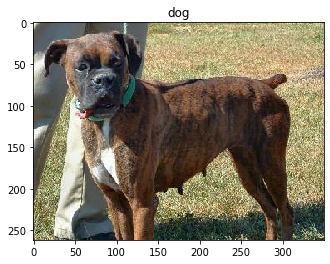

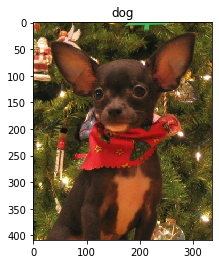

In [5]:
get_label_name = metadata.features['label'].int2str  # creates a function object that we can use to get labels

# display 2 images from the dataset
for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

## Data Preprocessing

Since the sizes of our images are all different we need to convert them all to the same size.

In [0]:
IMG_SIZE = 160 # All images will resized to 160x160
## It is better to make the image size smaller. 
def format_example(image, label):
  """
  returns an image that it reshapes to IMG_SIZE
  """ 
  image = tf.cast(image, tf.float32) ## Convert every single pixle to float32 value
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [0]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

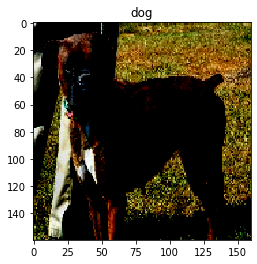

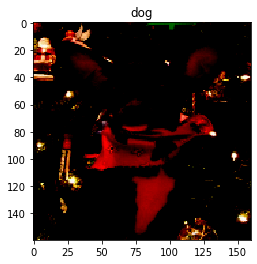

In [9]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [10]:
## Look a the shape of an original image vs the new image
for img, label in raw_train.take(2):
  print("Original shape:", img.shape)

for img, label in train.take(2):
  print("New shape:", img.shape)

Original shape: (262, 350, 3)
Original shape: (409, 336, 3)
New shape: (160, 160, 3)
New shape: (160, 160, 3)


### Picking a Pre-Trained model
 We want to use the model but only its convolutional base. So when we load in the model we'll specify that we don't want to load the top (classification) layer. We'll tell the model what input shape to expect and to use the predetermined weights from ImageNet (Google dataset)

In [11]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE,
                                               include_top=False,
                                               weights ='imagenet')

9412608/9406464 [==============================] - 1s 0us/step


In [12]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [14]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

for image, _ in train_batches.take(1):
  pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [15]:
## Freezing the Base

base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

#### ADD our own classifier

Now that we have the base layer setup we can add the classifier. Instead of flattening the feature map of the base layer we will use a global average pooling layer that will average the entire 5x5 area of each 2D feature map and return to us a single 1280 element vector per filter.

Then we will add the prediction layer that will be a single dense neuron.

In [16]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

prediction_layer = keras.layers.Dense(1)

## Combine the model

model = tf.keras.Sequential([
                base_model,
                global_average_layer, 
                prediction_layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


#### Training the Model


In [19]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'])

## We can evaluate the model right now to see how it does before training it on our new images
initial_epochs =3
validation_steps =20

loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 14s 689ms/step - loss: 0.8870 - accuracy: 0.4766


In [20]:
## Now we can train it on our images
history = model.fit(train_batches,
                    epochs = initial_epochs,
                    validation_data = validation_batches)

acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 656s 1s/step - loss: 0.4024 - accuracy: 0.7916 - val_loss: 0.1838 - val_accuracy: 0.8938
Epoch 2/3
582/582 [==============================] - 653s 1s/step - loss: 0.2040 - accuracy: 0.9149 - val_loss: 0.1413 - val_accuracy: 0.9243
Epoch 3/3
582/582 [==============================] - 655s 1s/step - loss: 0.1660 - accuracy: 0.9308 - val_loss: 0.1274 - val_accuracy: 0.9321
[0.7915637, 0.91488445, 0.93084365]


In [0]:
# Save the model

model.save('dogs_vs_cats.h5')

## Load the saved model

new_model = tf.keras.models.load_model('dogs_vs_cats.h5')